In [1]:
from pyscenic.rss import regulon_specificity_scores

In [19]:
from pyscenic.plotting import plot_rss
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyscenic.binarization import binarize
import scanpy as sc
from adjustText import adjust_text

In [3]:
adata_scenic = sc.read("/home/spuccio/isilon/spuccio/SP028_Autoimmunity/h5_files/CD4/CD4_res06_cariplo.h5ad")

In [4]:
tmp = adata_scenic[adata_scenic.obs["desc_0.6"].isin([3])]

In [5]:
auc_mtx = pd.read_csv("/home/spuccio/data/auc_mtx_imputed.csv",header=0,index_col=0)

In [6]:
tmp2 = pd.merge(tmp.obs['TumorType'],auc_mtx,left_index=True, right_index=True)

In [7]:
tmp2 = tmp2.set_index(['TumorType'])

In [8]:
rss_cellType = regulon_specificity_scores( tmp2, tmp2.index)
rss_cellType

,AHR(+),AHRR(+),ARNT(+),ARNT2(+),ARNTL(+),ASCL2(+),ATF1(+),ATF2(+),ATF3(+),ATF4(+),...,ZNF831(+),ZNF846(+),ZNF85(+),ZNF91(+),ZSCAN21(+),ZSCAN30(+),ZSCAN9(+),ZXDA(+),ZXDB(+),ZXDC(+)
IBD,0.811418,NaN,0.787034,0.794563,0.780505,0.451837,0.783716,0.808536,0.794807,0.782918,...,0.789094,NaN,0.797748,0.797488,NaN,0.364368,NaN,0.175866,NaN,0.797269
CRC,0.268229,NaN,0.294522,0.287327,0.300153,0.362985,0.297603,0.272521,0.287785,0.297567,...,0.292848,NaN,0.283750,0.282997,NaN,0.176108,NaN,0.176781,NaN,0.284539


In [16]:
cats = sorted(list(set(tmp2.index)))

In [17]:
cats

['CRC', 'IBD']

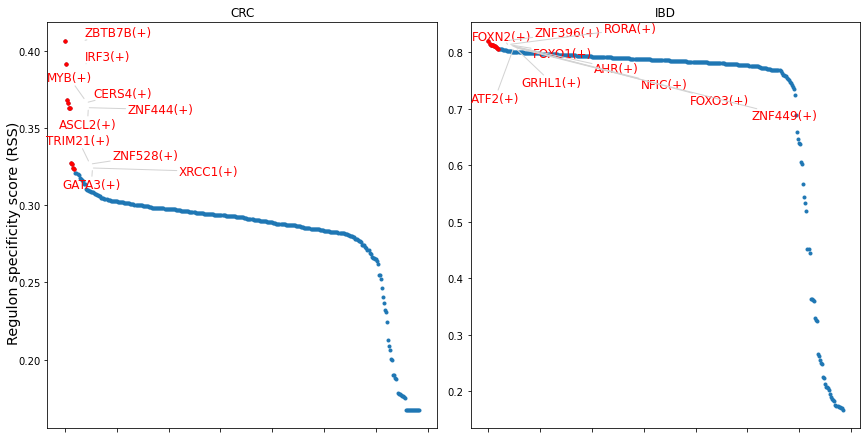

In [21]:
fig = plt.figure(figsize=(12, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
#fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.0, 0.6, 'Regulon specificity score (RSS)', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed.pdf", dpi=600, bbox_inches = "tight")
plt.show()

In [38]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:10].index)
    )
topreg = list(set(topreg))

In [23]:
#auc_mtx = pd.read_csv("/home/spuccio/data/auc_mtx2.csv",sep="\t",header=0,index_col=0)

In [39]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [40]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [41]:

colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in tmp2.index ]

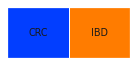

In [42]:
import numpy as np
import matplotlib as mpl
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("/home/spuccio/data/regulon2_imputed.pdf", dpi=600, bbox_inches = "tight")

In [43]:
auc_mtx_Z = auc_mtx_Z.set_index(tmp2.index)

In [44]:
auc_mtx_Z[topreg]

,IRF3(+),TRIM21(+),ZNF449(+),NFIC(+),ATF2(+),ZNF528(+),GRHL1(+),ZNF444(+),ASCL2(+),MYB(+),ZBTB7B(+),FOXO1(+),ZNF396(+),XRCC1(+),CERS4(+),RORA(+),GATA3(+),FOXN2(+),FOXO3(+),AHR(+)
TumorType,,,,,,,,,,,,,,,,,,,,
IBD,-0.800944,-0.543840,0.566956,0.541470,0.253748,-0.443787,-0.127067,0.146237,0.143876,-0.332955,-0.381949,-0.111430,0.024027,-0.465728,-0.321651,0.835351,0.037962,1.181223,0.042804,0.324588
IBD,0.342433,-0.182372,-0.512754,-0.241596,-0.191452,-0.664585,0.485066,1.250324,1.242782,0.031826,-0.381949,0.200797,0.322961,-0.673106,-0.321651,-0.368609,0.922451,-0.312718,-0.769966,-0.567972
IBD,-0.800944,-0.637727,0.375615,0.880798,0.617049,0.027249,-0.285377,-0.535700,-0.534861,-0.332955,-0.381949,0.251625,0.095512,0.087280,-0.321651,0.027752,1.202433,-0.042386,-0.370826,-0.017537
IBD,-0.800944,0.014792,-0.321413,0.241294,0.176048,0.542444,-0.908064,0.048817,0.046913,-0.332955,-0.381949,0.197166,0.335959,-0.742232,-0.321651,0.250904,-0.012944,0.210161,0.129745,-0.505893
IBD,0.540619,0.643840,-2.084483,-0.711436,-1.550154,2.102750,-1.720723,1.396453,1.388226,-0.332955,3.112240,-1.538236,-1.613610,0.654113,-0.321651,-1.483839,1.081532,-1.237538,-0.954387,-1.472948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRC,1.562036,2.624871,-2.713174,-1.337889,-2.566555,0.527724,-1.784047,1.315270,1.307424,-0.332955,2.768115,-3.055806,-1.522631,1.110345,3.295907,-2.265403,1.011536,-1.739076,-1.952895,-2.128228
CRC,1.973652,0.376260,-1.004773,-1.494502,-1.107053,0.571884,-1.361886,0.470968,0.467083,-0.332955,1.471030,-0.401874,-1.519381,1.331548,-0.321651,-1.373326,1.940568,-1.454516,-0.507825,-1.086678
CRC,0.632089,2.906534,-0.007067,0.424010,-1.245654,-1.606656,-1.382994,2.955165,2.939624,-0.332955,1.259261,-1.258684,-1.509633,2.091934,7.251553,-1.471619,2.055107,-1.276665,-1.407536,-0.963899


/home/spuccio/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


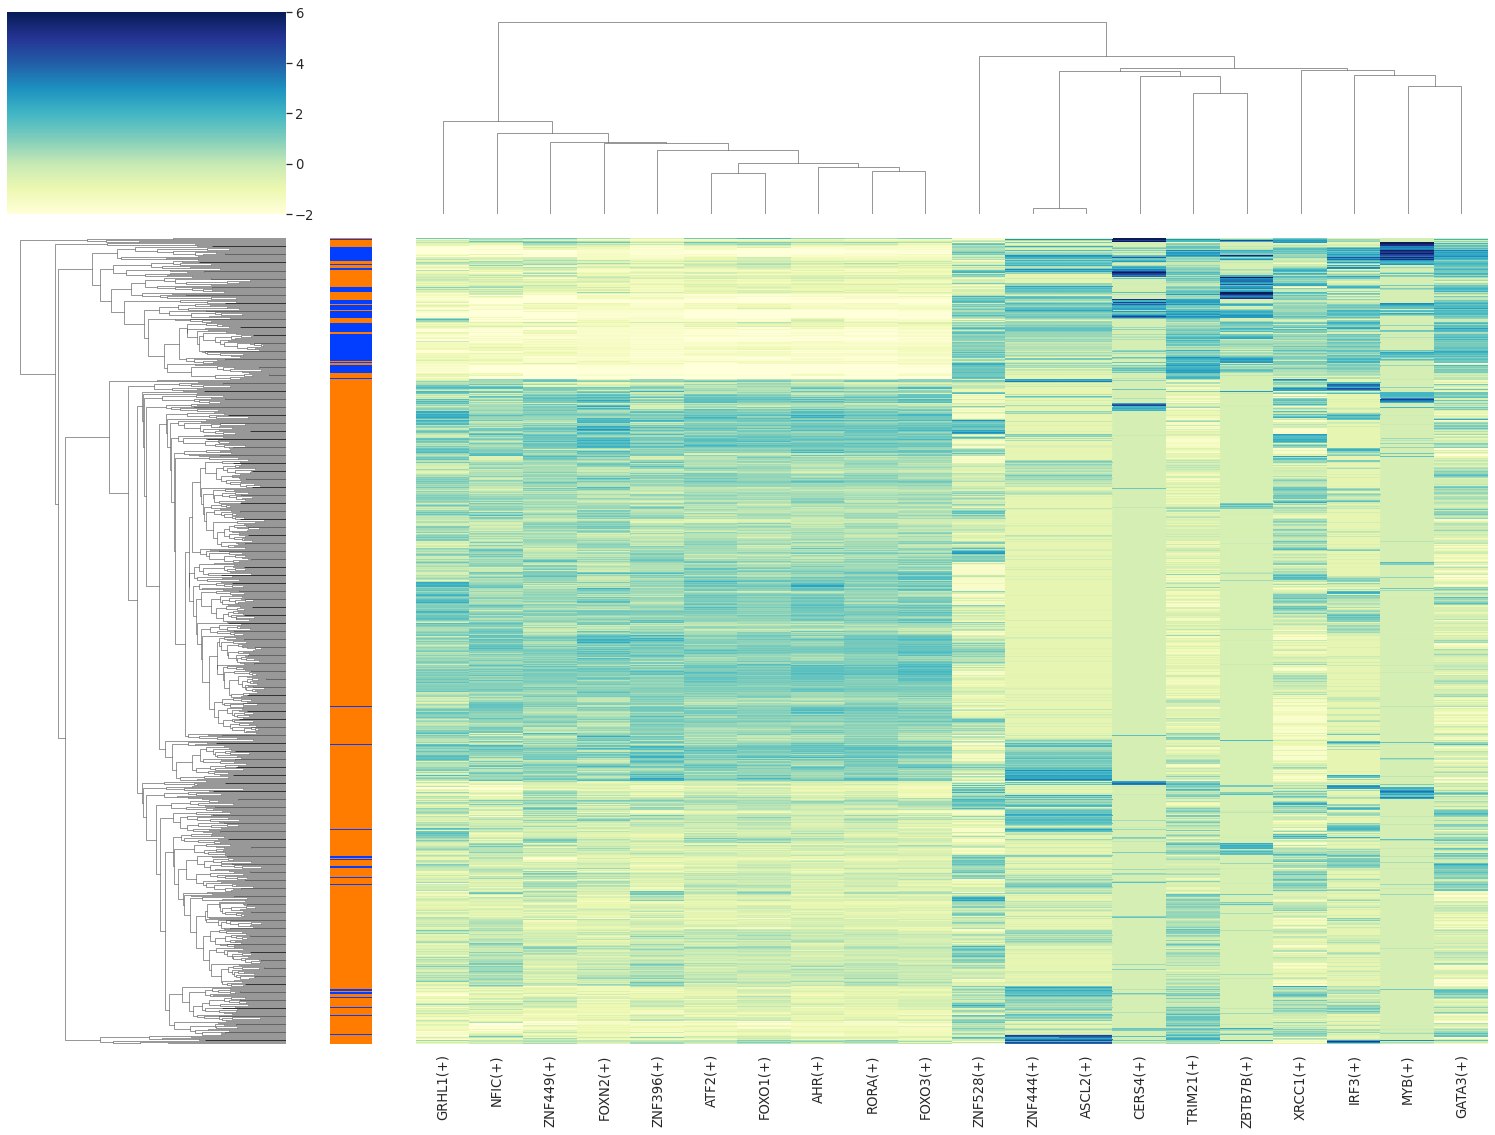

In [45]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg],  linecolor='gray',
    yticklabels=False, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("/home/spuccio/data/regulon3_imputed.pdf", dpi=600, bbox_inches = "tight")